# Vehicle Fuel Efficiency Prediction using TensorFlow

## Table of Contents
1. Introduction & Goals
2. Import Libraries and Dataset
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Model Development
6. Model Training and Evaluation
7. Hyperparameter Tuning
8. Results and Interpretation
9. Conclusions and Next Steps

## 1. Introduction & Goals

**Objective:**
Predict vehicle fuel efficiency (Miles Per Gallon, MPG) based on several vehicle features using TensorFlow Neural Network regression.

**Dataset Source:** [UCI Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

**Dataset Features:**
- Cylinders
- Displacement
- Horsepower
- Weight
- Acceleration
- Model Year
- Origin

## 2. Import Libraries and Dataset

In [18]:
# Importing necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Visual style setup
sns.set(style="whitegrid")

## 3. Exploratory Data Analysis (EDA)

In [2]:
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features 
y = auto_mpg.data.targets

df = pd.concat([X, y], axis=1)
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [3]:
# Data types, missing values, and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [4]:
# Statistical summary
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [5]:
# Check for missing values
df.isnull().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

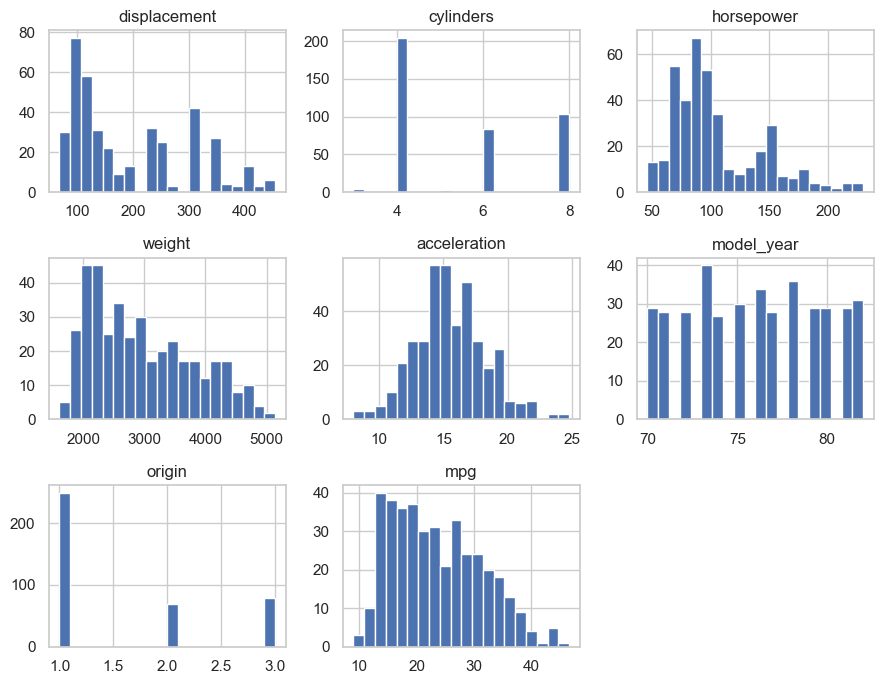

In [6]:
# Histogram for all numeric features
df.hist(bins=20, figsize=(9,7))
plt.tight_layout()
plt.show()

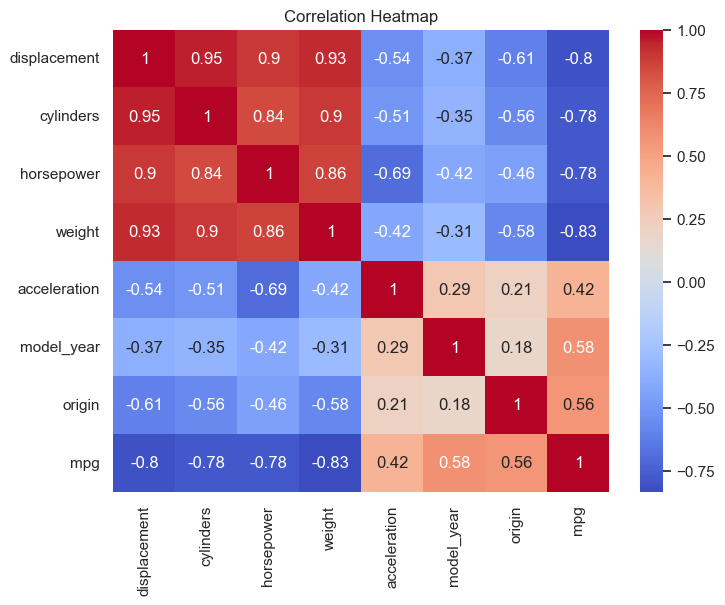

In [7]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 4. 🔧 Data Preprocessing

Handling:
- Missing values.
- Encoding categorical features.
- Scaling numerical features.
- Splitting data into training and test sets.

### Missing values

The `horsepower` column contains missing entries. They were replaced with the median value of the column to maintain data integrity and minimize bias.

In [8]:
# horsepower column contain missing values
df[df.isnull().any(axis=1)]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
32,98.0,4,NaN,2046,19.0,71,1,25.0
126,200.0,6,NaN,2875,17.0,74,1,21.0
330,85.0,4,NaN,1835,17.3,80,2,40.9
336,140.0,4,NaN,2905,14.3,80,1,23.6
354,100.0,4,NaN,2320,15.8,81,2,34.5
374,151.0,4,NaN,3035,20.5,82,1,23.0


In [9]:
# Imputing missing values with median
print(f"Horsepower median: {df['horsepower'].median()}")
df["horsepower"] = df['horsepower'].fillna(df['horsepower'].median())

Horsepower median: 93.5


### Encoding categorical features, scaling and splitting the data

The `origin` column represents the geographical origin of vehicles and needs to be encoded into numeric values using one-hot encoding.

Features have been scaled using `MinMaxScaler`, which scales each feature to a given range, typically [0, 1]. After scaling, the dataset has been split into training (80%) and test sets (20%) to evaluate the model's predictive performance on unseen data.


In [10]:
ct = make_column_transformer(
    (MinMaxScaler(), ["displacement", "cylinders", "horsepower", "weight", "acceleration", "model_year"]),
    (OneHotEncoder(handle_unknown="ignore"), ["origin"] ))

In [11]:
# Split into Train and Test Sets
X = df.drop('mpg', axis=1)
y = df["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## 5. Model Development

In [12]:
# Defining the neural network model structure
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normal.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Model compilation
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


## 6. Model Training and Evaluation

In [13]:
history = model.fit(
    X_train_normal, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
18/18 [==============================] - 1s 19ms/step - loss: 604.5767 - mae: 23.2736 - val_loss: 635.1678 - val_mae: 23.9350
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 561.3950 - mae: 22.2826 - val_loss: 586.8000 - val_mae: 22.8459
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 499.5829 - mae: 20.7222 - val_loss: 506.2890 - val_mae: 20.9052
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 400.7792 - mae: 17.9245 - val_loss: 381.7358 - val_mae: 17.3958
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 272.9309 - mae: 13.6873 - val_loss: 240.1837 - val_mae: 13.1323
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 168.3305 - mae: 10.7064 - val_loss: 145.8237 - val_mae: 10.2539
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 119.9927 - mae: 9.3887 - val_loss: 105.1267 - val_mae: 8.6153
Epoch 8/100
18/18 [=======================

In [14]:
# Evaluate on test set
loss, mae = model.evaluate(X_test_normal, y_test, verbose=1)

print(f"Test MSE (loss): {loss:.3f}")
print(f"Test MAE: {mae:.3f}")

3/3 [==============================] - 0s 2ms/step - loss: 5.1460 - mae: 1.6768
Test MSE (loss): 5.146
Test MAE: 1.677


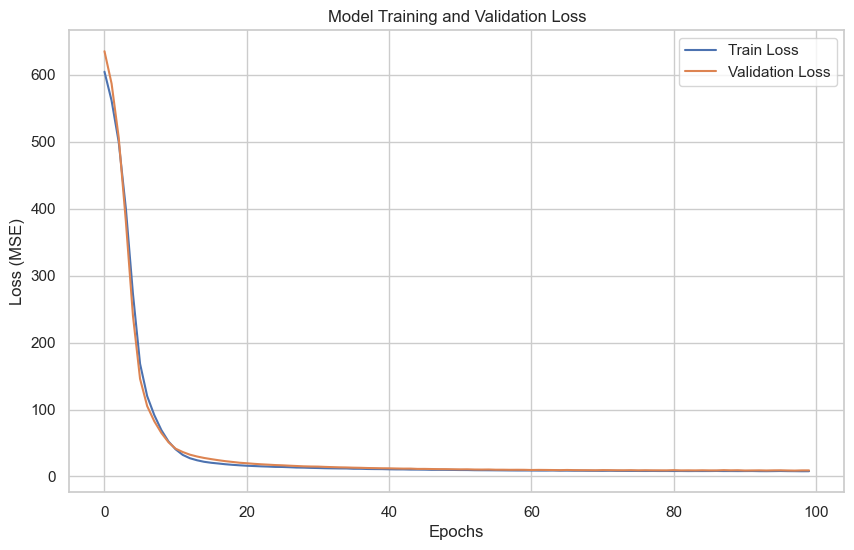

In [15]:
# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.show()

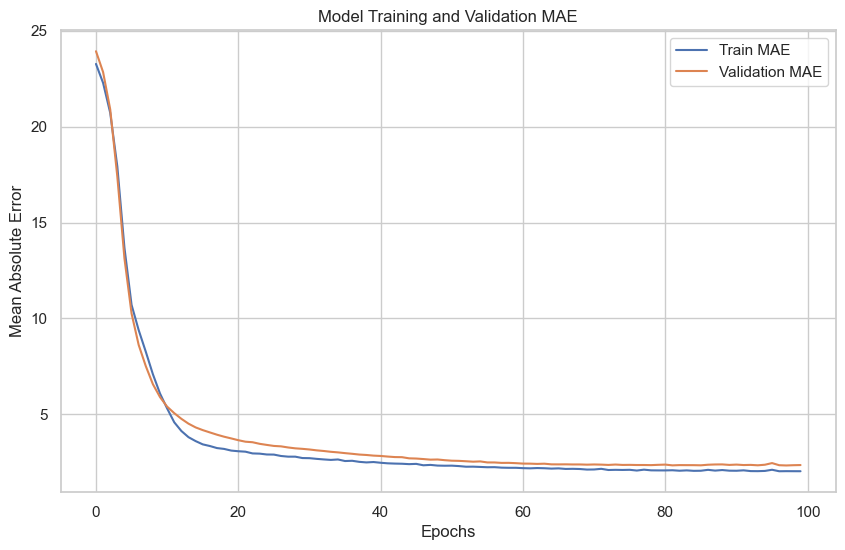

In [16]:
# Plot training & validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Model Training and Validation MAE')
plt.legend()
plt.show()